In [1]:
import csv
import math
import pymunk
import pymunk.pygame_util
import pyglet
import pymunk.constraints
import matplotlib.pyplot as plt
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
SCREEN_HEIGHT = 700
# window = pyglet.window.Window(1000, SCREEN_HEIGHT, vsync=False, caption='Inverted Pendulum Simulator')

# setup the space
space = pymunk.Space()
space.gravity = 0, -9.8

fil = pymunk.ShapeFilter(group=1)

# ground
ground = pymunk.Segment(space.static_body, (-4, -0.1), (4, -0.1), 0.1)
ground.friction = 0.1
ground.filter = fil
space.add(ground)

# cart 1
cart1_mass = 0.5
cart1_size = 0.3, 0.2
cart1_moment = pymunk.moment_for_box(cart1_mass, cart1_size)
cart1_body = pymunk.Body(mass=cart1_mass, moment=cart1_moment)
cart1_body.position = -0.3, cart1_size[1] / 2
cart1_shape = pymunk.Poly.create_box(cart1_body, cart1_size)
cart1_shape.friction = ground.friction
space.add(cart1_body, cart1_shape)

# cart 2
cart2_mass = 0.5
cart2_size = 0.3, 0.2
cart2_moment = pymunk.moment_for_box(cart2_mass, cart2_size)
cart2_body = pymunk.Body(mass=cart1_mass, moment=cart2_moment)
cart2_body.position = 0.3, cart1_size[1] / 2
cart2_shape = pymunk.Poly.create_box(cart2_body, cart2_size)
cart2_shape.friction = ground.friction
space.add(cart2_body, cart2_shape)


# pendulum 1
pend1_length = 0.6  # to center of mass
pend1_size = 0.01, pend1_length * 2  # to get CoM at 0.6 m
pend1_mass = 0.2
pend1_moment = 0.001
pend1_body = pymunk.Body(mass=pend1_mass, moment=pend1_moment)
pend1_body.position = (cart1_body.position[0], cart1_body.position[1] + cart1_size[1] / 2 + pend1_length)
# pend1_body.rotation_vector = (0.0, 0.0)
pend1_shape = pymunk.Poly.create_box(pend1_body, pend1_size)
pend1_shape.filter = fil
space.add(pend1_body, pend1_shape)

# pendulum 2
pend2_length = 0.6  # to center of mass
pend2_size = 0.01, pend2_length * 2  # to get CoM at 0.6 m
pend2_mass = 0.2
pend2_moment = 0.001
pend2_body = pymunk.Body(mass=pend2_mass, moment=pend2_moment)
pend2_body.position = (cart2_body.position[0], cart2_body.position[1] + cart2_size[1] / 2 + pend2_length)
pend2_shape = pymunk.Poly.create_box(pend2_body, pend2_size)
pend2_shape.filter = fil
space.add(pend2_body, pend2_shape)

# joint
joint1 = pymunk.constraints.PivotJoint(cart1_body, pend1_body, cart1_body.position + (0, cart1_size[1] / 2))
joint1.collide_bodies = False
space.add(joint1)

# joint 2
joint2 = pymunk.constraints.PivotJoint(cart2_body, pend2_body, cart2_body.position + (0, cart1_size[1] / 2))
joint2.collide_bodies = False
space.add(joint2)

# joint 3
# joint3 = pymunk.constraints.PivotJoint(pend1_body, pend2_body, (0,cart1_size[1] / 2 + 0.5916))
# joint3.collide_bodies = True
# space.add(joint3)

print(f"cart mass = {cart1_body.mass:0.1f} kg")
print(f"pendulum mass = {pend1_body.mass:0.1f} kg, pendulum moment = {pend1_body.moment:0.3f} kg*m^2")

cart mass = 0.5 kg
pendulum mass = 0.2 kg, pendulum moment = 0.001 kg*m^2


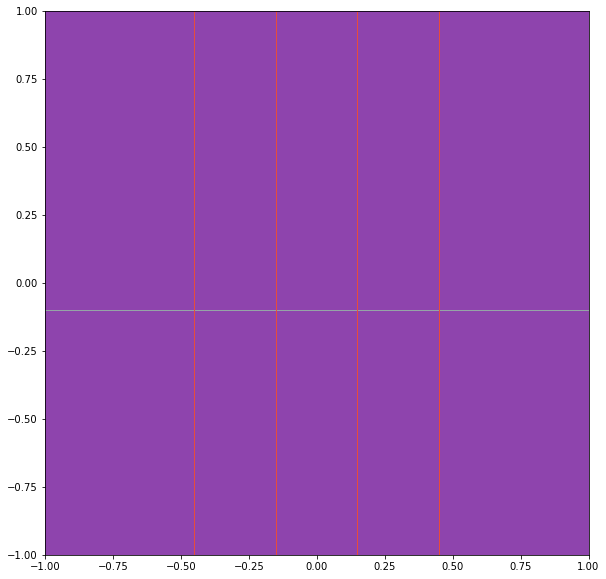

In [3]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
ax.set_aspect("equal")
o = pymunk.matplotlib_util.DrawOptions(ax)
space.step(1)
space.step(1)
space.debug_draw(o)
fig.savefig("matplotlib_util_demo.png", bbox_inches="tight")